<a href="https://colab.research.google.com/github/annikarichardson2024/Visualization/blob/main/Copy_of_assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment: Exploratory Data Analysis
### `! git clone https://github.com/DS3001/visualization`
### Do Q1 or Q2 or Q3, and Q4. You might want to refer to your work for the data wrangling assignment.

**Q1.** This question provides some practice doing exploratory data analysis and visualization.

The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `./data/college_completion.csv` data with Pandas.
2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
3. Cross tabulate `control` and `level`. Describe the patterns you see.
4. For `grad_100_value`, create a histogram, kernel density plot, boxplot, and statistical description.
5. For `grad_100_value`, create a grouped kernel density plot by `control` and by `level`. Describe what you see. Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `grad_100_value` by `level` and `control`. Which institutions appear to have the best graduation rates?
6. Create a new variable, `df['levelXcontrol']=df['level']+', '+df['control']` that interacts level and control. Make a grouped kernel density plot. Which institutions appear to have the best graduation rates?
7. Make a kernel density plot of `aid_value`. Now group your graph by `level` and `control`. What explains the shape of the graph? Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `aid_value` by `level` and `control`.
8. Make a scatterplot of `grad_100_value` by `aid_value`. Describe what you see. Now make the same plot, grouping by `level` and then `control`. Describe what you see. For which kinds of institutions does aid seem to increase graduation rates?

**Q2.** This question uses the Airbnb data to practice making visualizations.

  1. Load the `./data/airbnb_hw.csv` data with Pandas. You should have cleaned the `Price` variable in question 2, and you'll need it later for this question.
  2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
  3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?
  4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.
  5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.
  6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?
  7. We've looked a bit at this `price_log` and `Beds` scatterplot. Use seaborn to make a `jointplot` with `kind=hex`. Where are the data actually distributed? How does it affect the way you think about the plots in 5 and 6?

In [1]:
# PART 1
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/DS3001/visualization/main/assignment/data/airbnb_hw.csv')

# cleaning price be removing commas, changing to numeric
price = df['Price']
price = price.str.replace(',','')
price = pd.to_numeric(price,errors='coerce')
df['Price'] = price
del price


In [2]:
# PART 2
print(df.shape)
df.head()
df.columns

# dimensions of the data are 30,478 observations of 13 variables
# some columns include: Host Id, Host Since, Neighbourhood, Property Type

(30478, 13)


Index(['Host Id', 'Host Since', 'Name', 'Neighbourhood ', 'Property Type',
       'Review Scores Rating (bin)', 'Room Type', 'Zipcode', 'Beds',
       'Number of Records', 'Number Of Reviews', 'Price',
       'Review Scores Rating'],
      dtype='object')

In [3]:
# PART 3
pd.crosstab(df['Property Type'],df['Room Type'])

# Most of the properties are apartments, Houses, Lofts, and Condos.
# Among those, Apartments rent out usually the entire property, but for
# the rental is more likely to be a private room than an entire property for houses.
# For condos and lofts the whole property is more likely to be rented out.


Room Type,Entire home/apt,Private room,Shared room
Property Type,,,
Apartment,15669,10748,685
Bed & Breakfast,13,155,12
Boat,7,1,0
Bungalow,4,0,0
Cabin,1,1,0
Camper/RV,6,1,0
Castle,0,1,0
Chalet,0,1,0
Condominium,72,22,0


<Axes: xlabel='Price', ylabel='Density'>

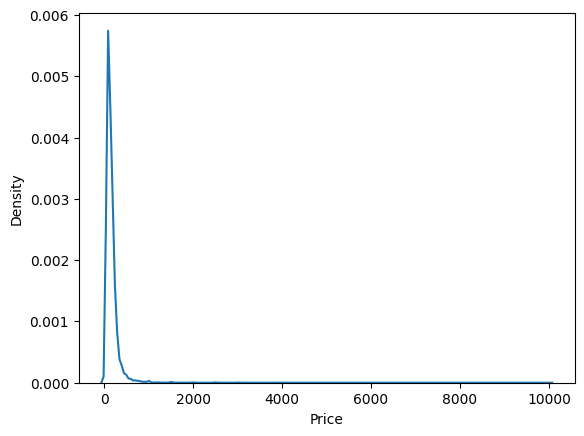

In [4]:
# PART 4
# all the plots for price variable. The describe function proves that the data is poorly scaled
# and several outliers
import seaborn as sns
import numpy as np
sns.kdeplot(data=df,x='Price')

#yes data is badly scaled for the purposes of using this plot

<Axes: xlabel='Price', ylabel='Count'>

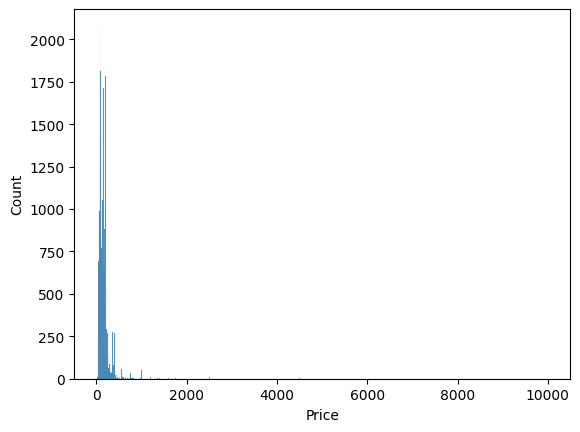

In [5]:
sns.histplot(data=df,x='Price')
# data is badly scaled for the purposes of using this plot

count    30478.000000
mean       163.589737
std        197.785454
min         10.000000
25%         80.000000
50%        125.000000
75%        195.000000
max      10000.000000
Name: Price, dtype: float64

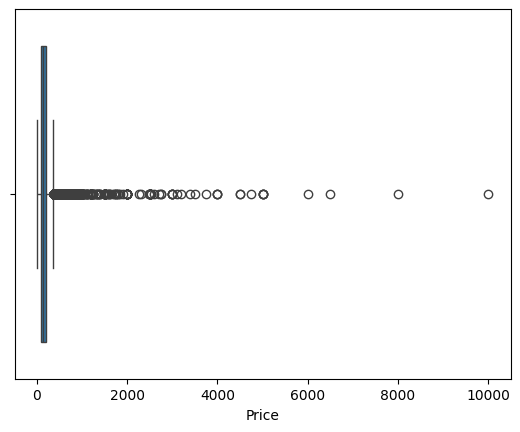

In [6]:
sns.boxplot(data=df,x='Price')
df['Price'].describe()

#yes data is badly scaled for the purposes of using this plot and for it to be readable

<Axes: xlabel='Price_log', ylabel='Count'>

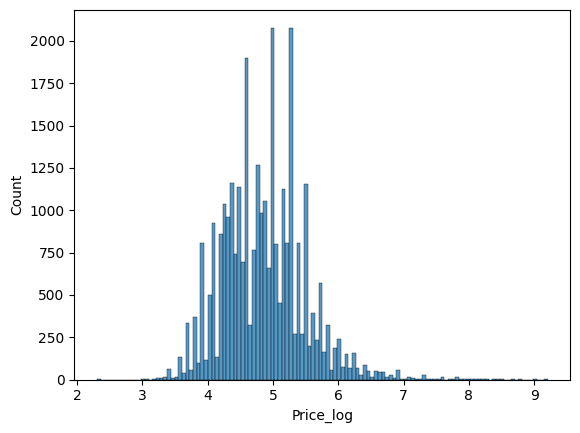

In [7]:
#log to transform price into a new variables. More normally distributed
df['Price_log'] = np.log(df['Price'])
sns.histplot(data=df,x='Price_log')

# much better scale

<Axes: xlabel='Price_log', ylabel='Density'>

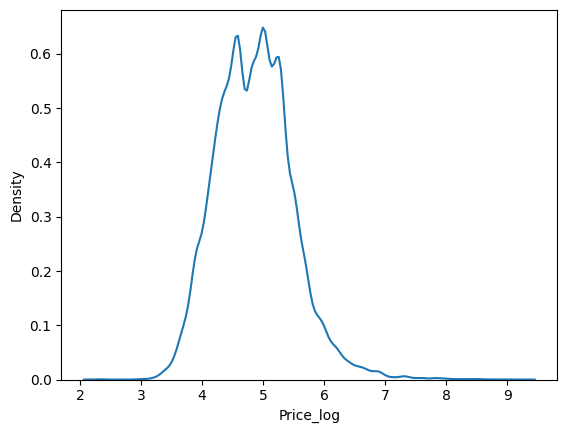

In [8]:
sns.kdeplot(data=df,x='Price_log')

count    30478.000000
mean         4.860495
std          0.627704
min          2.302585
25%          4.382027
50%          4.828314
75%          5.273000
max          9.210340
Name: Price_log, dtype: float64

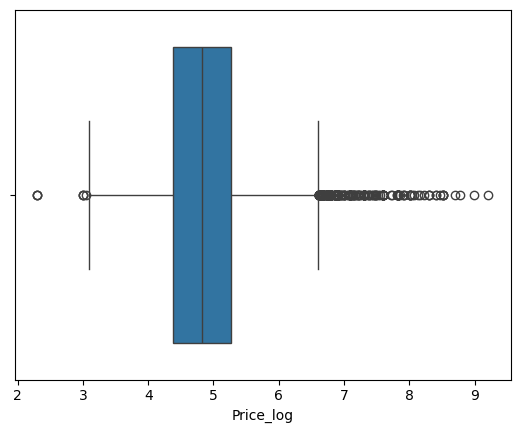

In [9]:
sns.boxplot(data=df,x='Price_log')
df['Price_log'].describe()

Price                                                           \
        count         mean          std    min     25%    50%      75%   
Beds                                                                     
0.0       2.0    92.000000    38.183766   65.0   78.50   92.0   105.50   
1.0   20344.0   127.673810   107.047827   10.0   75.00  100.0   155.00   
2.0    6610.0   199.061271   225.706318   25.0  115.00  160.0   225.00   
3.0    2071.0   268.118300   303.106942   26.0  140.00  200.0   300.00   
4.0     783.0   315.332056   353.184402   27.0  150.00  247.0   375.00   
5.0     284.0   411.500000   672.610659   35.0  189.75  290.0   450.00   
6.0     177.0   401.768362   417.018431   35.0  199.00  275.0   425.00   
7.0      45.0   341.377778   220.116631   55.0  177.00  300.0   445.00   
8.0      24.0   589.041667   793.054934   55.0  243.75  350.0   481.25   
9.0      15.0   618.000000   233.649616  175.0  447.50  650.0   762.50   
10.0     16.0   480.187500   296.820534   95.0  291.00  407.5   706.25   
11.0      5.0   535.800000   499.217588  100.0  220.00  359.0   650.00   
12.0      4.0  1418.750000  2388.285211  150.0  206.25  262.5  1475.00   
16.0     13.0   736.000000   496.804287  104.0  350.00  625.0  1000.00   

               
          max  
Beds           
0.0     119.0  
1.0    4000.0  
2.0   10000.0  
3.0    5000.0  
4.0    6500.0  
5.0    8000.0  
6.0    2750.0  
7.0     900.0  
8.0    4000.0  
9.0    1050.0  
10.0   1050.0  
11.0   1350.0  
12.0   5000.0  
16.0   1500.0

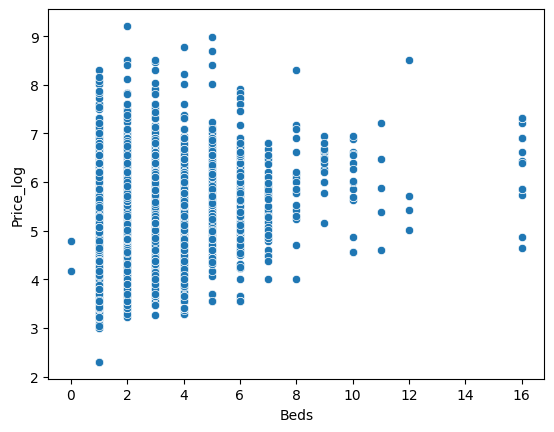

In [10]:
# PART 5
sns.scatterplot( data=df, x='Beds', y='Price_log')
# in this scatterplot we see that as the quantity of beds increases, the price tends to also increase
# However in the medium range of beds, the pattern is less clear likely because of outliers
# There is a very similar phenomena with standard deviation

df.loc[:,['Beds','Price']].groupby('Beds').describe()


Price                                                     \
                   count        mean         std   min    25%    50%    75%   
Room Type                                                                     
Entire home/apt  17024.0  220.796346  242.222346  10.0  135.0  175.0  240.0   
Private room     12609.0   91.919740   67.119678  10.0   65.0   80.0  100.0   
Shared room        845.0   80.514793  110.756196  10.0   45.0   60.0   85.0   

                          
                     max  
Room Type                 
Entire home/apt  10000.0  
Private room      3000.0  
Shared room       2500.0

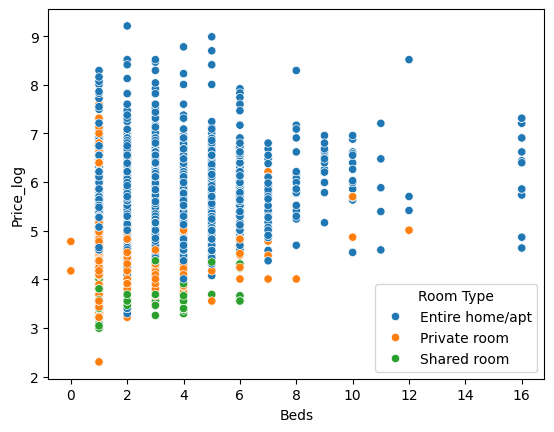

In [11]:
# PART 6
sns.scatterplot(data=df,x='Beds',y='Price_log',hue='Room Type')

variable = 'Price'
catagory = 'Room Type'
df.loc[:,[catagory,variable]].groupby(catagory).describe()

# shared room and private room are typically the cheapest properties for any given number of beds.
# entire home properties have the largest standard deviation
# median is a more accurate measure of central tendency because it is less impacted by outliers


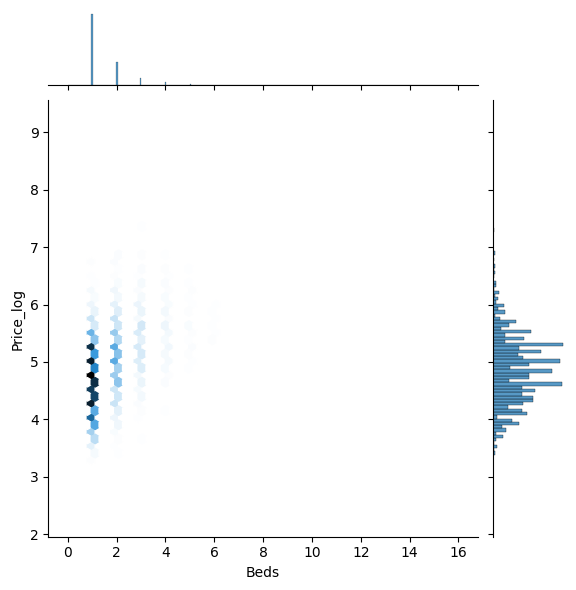

In [12]:
# PART 7
sns.jointplot(data=df,x='Beds',y='Price_log',kind='hex')

# the data is actually distributed with most properties only haveing 1 or 2 beds,
# and a smaller number having 3 or 4 beds. As for price, the majority fall in the 2.5 to 6 log point range
# this therefore meant outliers were very noticeable

**Q3.** Open the `./data/CBO_data.pdf` file. This contains tax data for 2019, explaining where the money comes from that the U.S. Federal Government Spends in terms of taxation on individuals/families and payroll taxes (the amount that your employer pays in taxes on your wages).

For some context, the Federal government ultimately spent about $4.4 trillion in 2019, which was 21% of GDP (the total monetary value of all goods and services produced within the United States). Individual Income Taxes is the amount individuals pay on their wages to the Federal government, Corporate Income Taxes is the taxes individuals pay on capital gains from investment when they sell stock or other financial instruments, Payroll Taxes is the tax your employer pays on your wages, Excises and Customs Duties are taxes on goods or services like sin taxes on cigarettes or alcohol, and Estate and Gift Taxes are taxes paid on transfers of wealth to other people.

1. Get the Millions of Families and Billions of Dollars data into a .csv file and load it with Pandas.
2. Create a bar plot of individual income taxes by income decile. Explain what the graph shows. Why are some values negative?
3. Create a bar plot of Total Federal Taxes by income decile. Which deciles are paying net positive amounts, and which are paying net negative amounts?
4. Create a stacked bar plot for which Total Federal Taxes is grouped by Individual Income Taxes, Payroll Taxes, Excises and Customs Duties, and Estate and Gift Taxes. How does the share of taxes paid vary across the adjusted income deciles? (Hint: Are these the kind of data you want to melt?)
5. Below the Total line for Millions of Families and Billions of Dollars, there are data for the richest of the richest families. Plot this alongside the bars for the deciles above the Total line. Describe your results.
6. Get the Percent Distribution data into a .csv file and load it with Pandas. Create a bar graph of Total Federal Taxes by income decile.
7. A tax system is progressive if higher-income and wealthier individuals pay more than lower-income and less wealthy individuals, and it is regressive if the opposite is true. Is the U.S. tax system progressive in terms of amount paid? In terms of the percentage of the overall total?
8. Do the rich pay enough in taxes? Defend your answer.

**Q4.** Go to https://data.cms.gov/search.
1. Pick a dataset about something you are interested in. Download the data and data dictionary. If you really can't decide, you can always use this one: https://data.cms.gov/medicare-current-beneficiary-survey-mcbs/medicare-current-beneficiary-survey-data
3. Does the data dictionary document how missings are handled? For categorical variables, does it describe the possible values and missing value codes? For the numeric variables, does it describe how missing values are handled? Summarize your opinion of the data dictionary.
4. Pick out a few interesting variables, and explain why you find them jointly interesting. Clean those variables, documenting your choices by commenting in the code or in a markdown chunk in a notebook.
5. For the variables you select, make a boxplot for each numeric variable and a bar graph for each categorical variable. Do you see any outliers?
6. Create a histogram or kernel density plot, and explain what you see. Do the results require any transformations to rescale them?
7. Create a scatter plot, and describe the relationship you see.
8. Create a table (cross tabulation, variance-covariance, or a `.describe()` five-number summary), and explain what you see.

In [13]:
# PART 1
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/annikarichardson2024/HW3/main/puf2021_1_fall.csv', low_memory=False)



In [ ]:
# PART 2

# While the data dictionary is perhaps a little bit low-tech and an outdated way of displaying this information,
# is does a pretty holistic job at documenting all necessary information on possible variable. It also explains
# what each variable represents and it does this for all of the categorical and numeric variables

In [14]:
# PART 3

# some variables that I found interesting were marital status and the race/ethnicity age group of participants
# and how those variables could potentially have an impact on the rest of this medical-related date
# both are categorical variables but ethnicity age group has many more catagories

RemOutlier = df['DEM_MARSTA']
RemOutlier = RemOutlier.replace(['R'],' ') #mark unclear values
df['DEM_MARSTA'] = RemOutlier
del RemOutlier
df['DEM_MARSTA'].value_counts()

RemOutlier2 = df['DEM_RE_AGE']
RemOutlier2 = RemOutlier2.replace(['13', '14'],'12') #mark unclear values
df['DEM_RE_AGE'] = RemOutlier2
del RemOutlier2
df['DEM_RE_AGE'].value_counts()



2     3351
3     3338
4     1455
1     1323
11     619
10     507
5      409
6      395
14     300
7      276
9      270
13     255
12     154
8      131
Name: DEM_RE_AGE, dtype: int64

<Axes: xlabel='DEM_RE_AGE'>

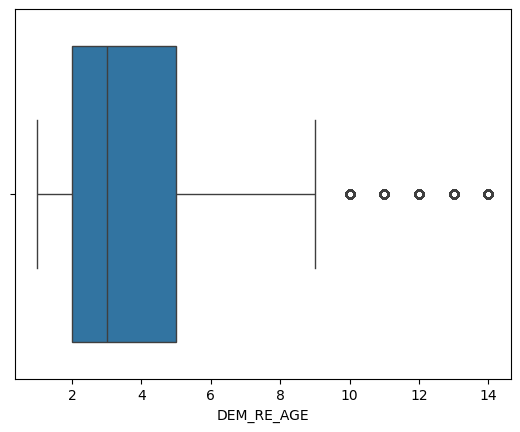

In [16]:
# PART 4
import seaborn as sns
sns.boxplot(data=df,x='DEM_RE_AGE')
# There are a few outliers here represented in the categories for inidividuals not falling
# into one of the given options for race.

#sns.barplot(data=df, x='DEM_INCSRCE')


<Axes: xlabel='DEM_RE_AGE', ylabel='Count'>

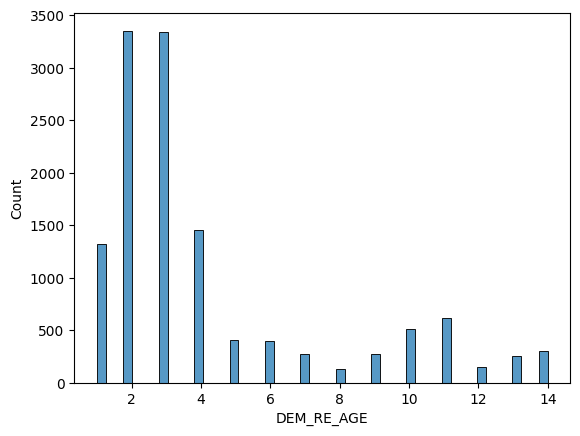

In [17]:
# PART 5
# histogram analyzing race and ethnicity along with age group
# this does not appear to require any re-scaling. it is a pretty
# helpful and easy to read histogram
sns.histplot(data=df,x='DEM_RE_AGE')

<Axes: xlabel='DEM_RE_AGE', ylabel='PUFF001'>

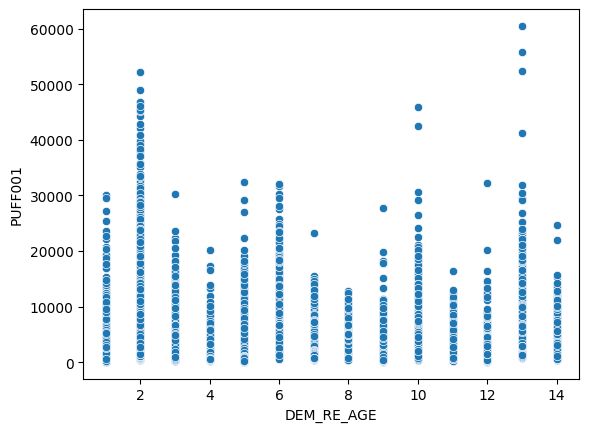

In [18]:
# PART 6
sns.scatterplot(data=df,x='DEM_RE_AGE',y='PUFF001')

# Catagory 13 appears to have the greatest number of outliers. This represents an "other"
# or unknown category for participants aged 65-74 so this result logically makes sense.
# There are very few outliers between categories 0 and 8. These all represent non-hispanic
# black and white individuals all in different age groups

In [19]:
# PART 7
df['DEM_RE_AGE'].describe()

#There is a pretty large standard deviation. It is almost as large as the mean.
# This is definetly due to outliers since the 75th percentile is 5 while the max is 14

count    12783.000000
mean         4.296800
std          3.424944
min          1.000000
25%          2.000000
50%          3.000000
75%          5.000000
max         14.000000
Name: DEM_RE_AGE, dtype: float64